In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns; sns.set(style="ticks", color_codes=True)

%matplotlib inline

# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Loading Data

In [2]:
sold = pd.read_csv('Cafe - Sell Meta Data.csv')
transactions = pd.read_csv('Cafe - Transaction - Store.csv')
date_info = pd.read_csv('Cafe - DateInfo.csv')

#### Get To Know Sales Data

In [3]:
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [4]:
sold.describe()
sold.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [5]:
#check null values
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


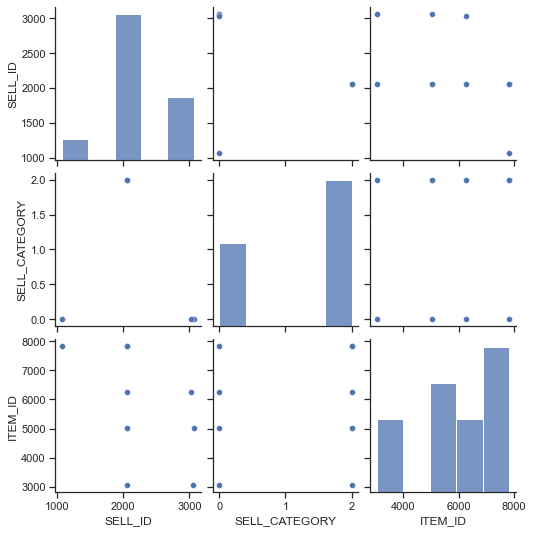

In [6]:
sns.pairplot(sold)

#### Get To Know Transaction Data

In [7]:
transactions.head(15)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0
5,01/02/12,12.73,22,2051,2
6,01/02/12,12.75,16,2052,2
7,01/02/12,12.60,34,2053,2
8,01/03/12,15.50,62,1070,0
9,01/03/12,12.73,26,2051,2


In [8]:
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [9]:
#check null value
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

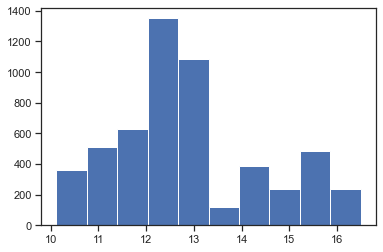

In [10]:
plt.hist(transactions.PRICE)

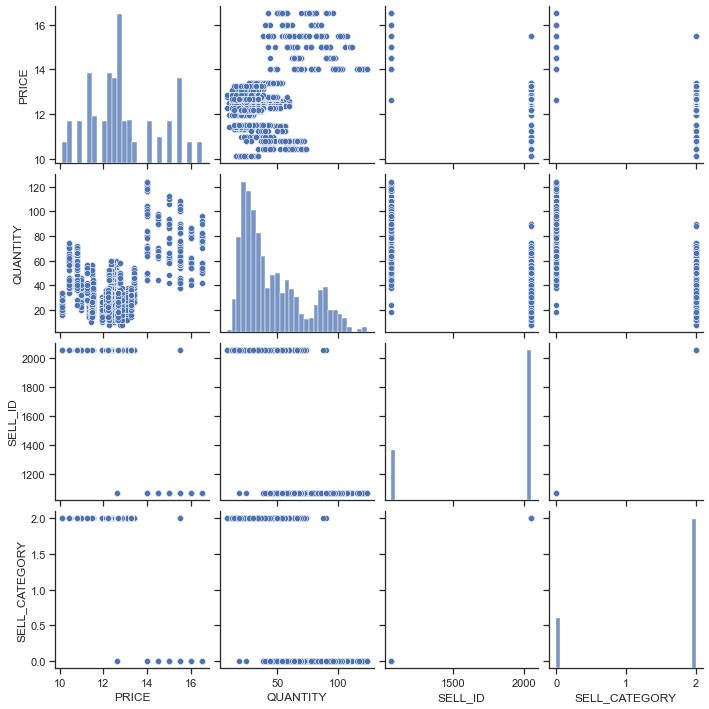

In [11]:
sns.pairplot(transactions)

#### Get To Know Date Info Data

In [12]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [13]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [14]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              105 non-null    object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


In [15]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna('No Holiday')

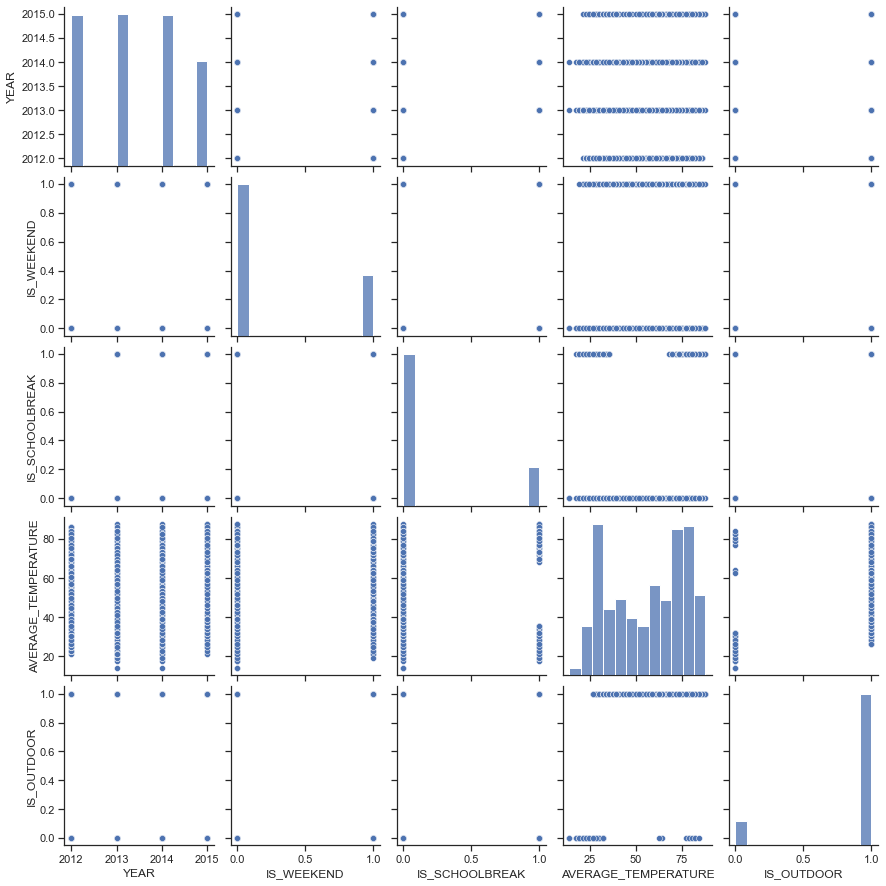

In [16]:
sns.pairplot(date_info)

In [17]:
date_info['HOLIDAY'].unique()

array(['New Year', 'No Holiday', 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

In [18]:
date_info['CALENDAR_DATE'].min()
date_info['CALENDAR_DATE'].max()

'1/1/12'

'9/9/15'

In [19]:
date_info.shape

(1349, 7)

In [20]:
date_info[date_info.isna().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


### Data Merging

In [21]:
#Check items sold in a SELL_ID
pd.concat([sold['SELL_ID'], pd.get_dummies(sold['ITEM_NAME'])], axis=1).groupby(sold['SELL_ID']).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [22]:
#Group data based on SELL ID
data1 = pd.merge(sold.drop(['ITEM_ID'], axis=1), transactions.drop(['SELL_CATEGORY'], axis=1))
data1_grouped = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).sum()

data1_grouped.head()

QUANTITY
SELL_ID SELL_CATEGORY ITEM_NAME CALENDAR_DATE PRICE          
1070    0             BURGER    01/01/12      15.5         46
                                01/01/13      15.5         60
                                01/01/14      15.5         72
                                01/01/15      14.0         66
                                01/02/12      15.5         70

In [23]:
#Filling out data from merged data
data2 = data1_grouped.reset_index()
data2.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [24]:
#displaying shapes
data1.shape
data1_grouped.shape
data2.shape

(10808, 6)

(10792, 1)

(10792, 6)

In [25]:
#Date range from merged data
data2['CALENDAR_DATE'].min()
data2['CALENDAR_DATE'].max()

'01/01/12'

'9/30/14'

In [26]:
#merge data with date_info dataset
data3 = pd.merge(data2, date_info, on = 'CALENDAR_DATE')
data3.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [27]:
#Displaying shape
data3.shape

(6696, 12)

In [28]:
#check NA values
data3[data3.isna().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [29]:
#check unique values
np.unique(data3['HOLIDAY'])
np.unique(data3['IS_WEEKEND'])
np.unique(data3['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [30]:
#filter data for Business As Usual (BAU) data
mask = (data3['HOLIDAY'] == 'No Holiday') & (data3['IS_WEEKEND'] == 0) & (data3['IS_SCHOOLBREAK'] == 0)
BAU_data = data3[mask]

BAU_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [31]:
#check shape
BAU_data.shape

(3768, 12)

In [32]:
#check unique values
np.unique(BAU_data['HOLIDAY'])
np.unique(BAU_data['IS_WEEKEND'])
np.unique(BAU_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

#### Dataset Exploration

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

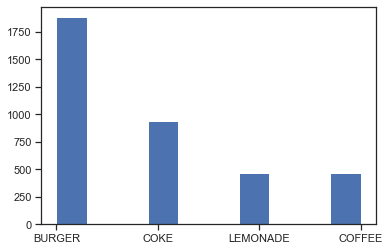

In [33]:
#Check item name distribution
plt.hist(BAU_data['ITEM_NAME'])

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Number of Occurence')

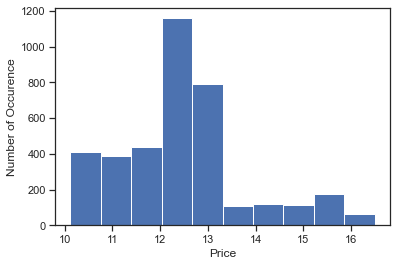

In [34]:
#check price distribution
plt.hist(BAU_data['PRICE'])
plt.xlabel('Price')
plt.ylabel('Number of Occurence')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Quantity')

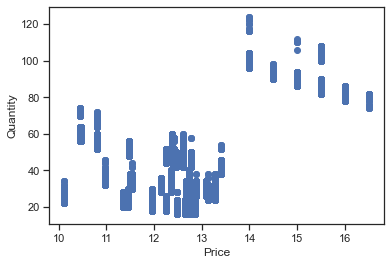

In [35]:
#check relationship between PRICE and QUANTITY
plt.scatter(BAU_data['PRICE'], BAU_data['QUANTITY'])
plt.xlabel('Price')
plt.ylabel('Quantity')

#### Burger Data

(837, 12)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

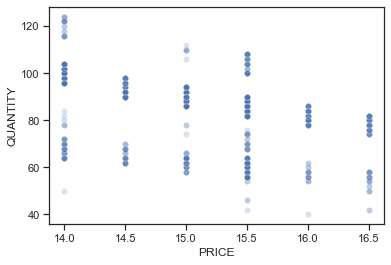

In [36]:
burger = data3[data3['ITEM_NAME'] == 'BURGER']
burger_1070 = burger[burger['SELL_ID'] == 1070]
burger_1070.shape
sns.scatterplot(data=burger_1070, x='PRICE', y='QUANTITY', alpha=0.2)

### Modeling

In [37]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.45e-32
Time:                        13:24:30   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

eval_env: 1
eval_env: 1


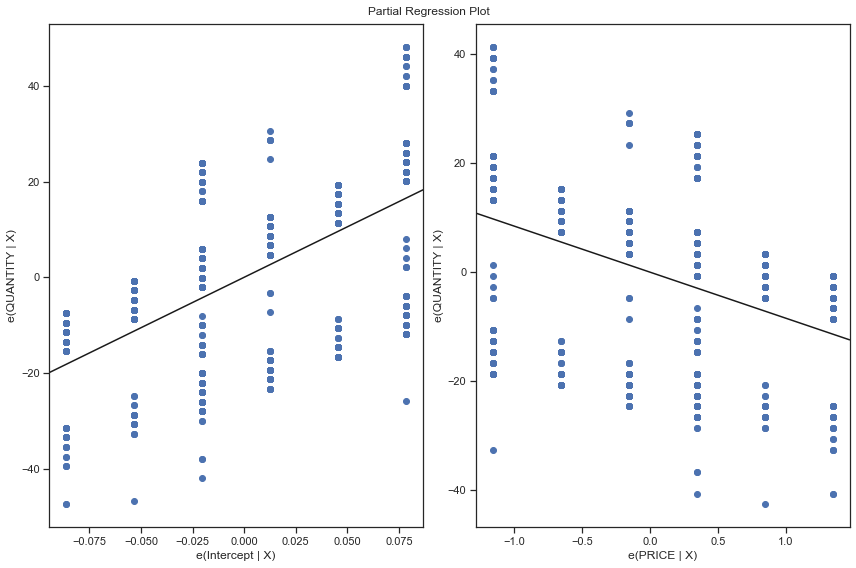

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

(471, 12)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
56,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

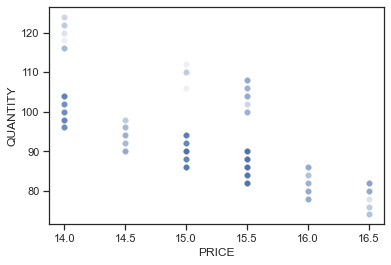

In [39]:
#use bau data BAU= Business As Usual
mask2 = (BAU_data['ITEM_NAME'] == 'BURGER') & (BAU_data['SELL_ID'] == 1070)
burger_bau_1070 = BAU_data[mask2]
burger_bau_1070.shape
burger_bau_1070.head()
sns.scatterplot(data=burger_bau_1070, x='PRICE', y='QUANTITY', alpha=0.1)

In [40]:
burger_bau_model = ols('QUANTITY ~ PRICE', data=burger_bau_1070).fit()
print(burger_bau_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           7.16e-70
Time:                        13:24:31   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

eval_env: 1
eval_env: 1


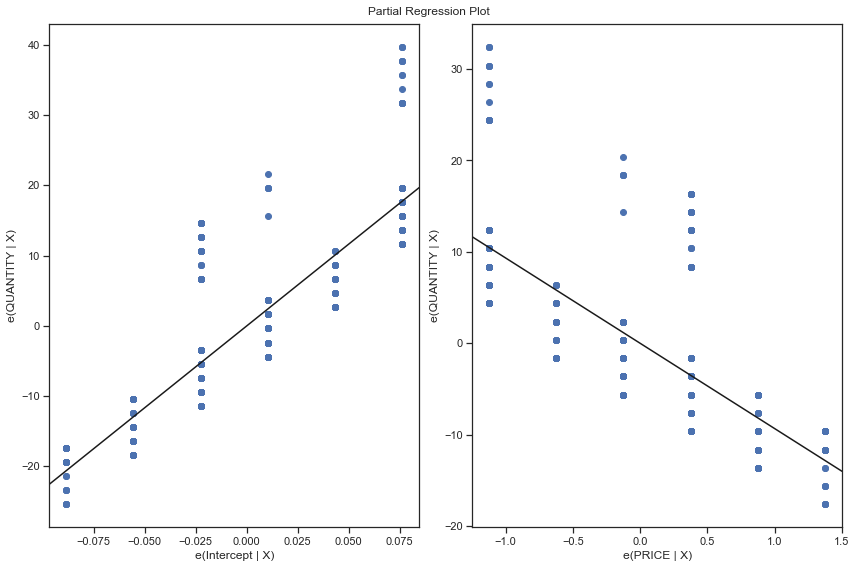

In [41]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_bau_model, fig=fig)

Notice that model does not have quite good level of R-Squared, therefore some adjustment on the data can be implemented

#### Improving data

In [42]:
BAU_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [43]:
np.unique(BAU_data['IS_WEEKEND'])
np.unique(BAU_data['HOLIDAY'])
np.unique(BAU_data['IS_SCHOOLBREAK'])
np.unique(BAU_data['IS_OUTDOOR'])

array([0], dtype=int64)

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

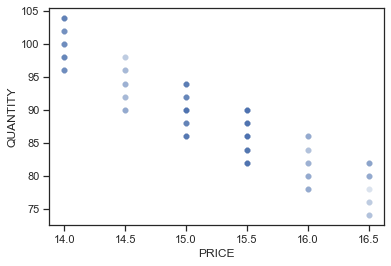

In [44]:
#adding OUTDOOR mask
mask3 = (BAU_data['ITEM_NAME'] == 'BURGER') & (BAU_data['SELL_ID'] == 1070) & (BAU_data['IS_OUTDOOR'] == 1)
burger_bau_1070_outdoor = BAU_data[mask3]

sns.scatterplot(data=burger_bau_1070_outdoor, x='PRICE', y='QUANTITY', alpha=0.1)

In [45]:
#rum model with improved data
burger_bau_outdoor_model = ols('QUANTITY ~ PRICE', burger_bau_1070_outdoor).fit()
print(burger_bau_outdoor_model.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          5.51e-153
Time:                        13:24:32   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

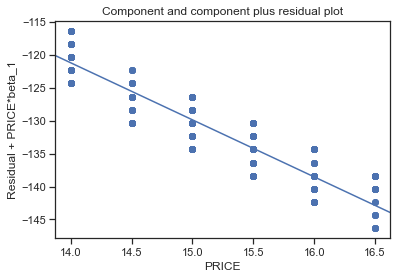

In [46]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_bau_outdoor_model, 'PRICE')

eval_env: 1


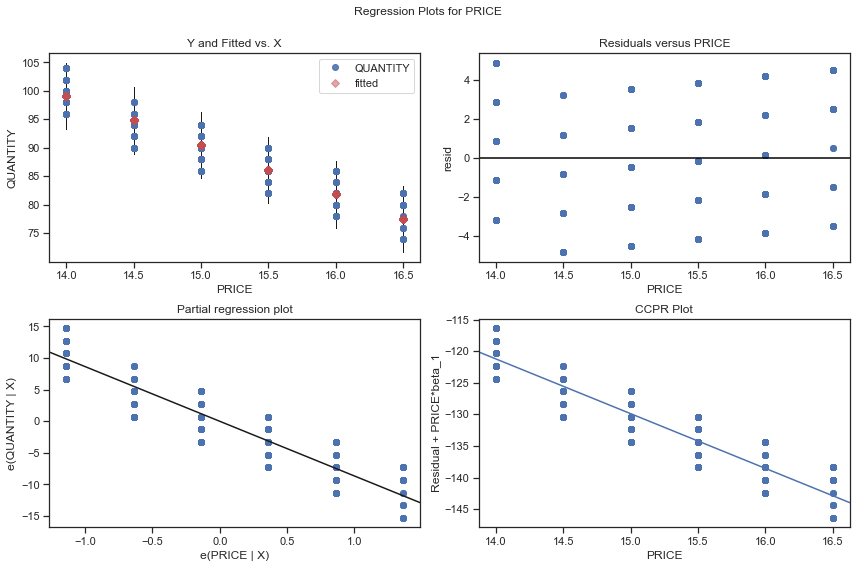

In [47]:
fig= plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_bau_outdoor_model, 'PRICE', fig=fig)

#### Create reproducible function

In [48]:
def model_and_elasticity(data):
    '''
    Create OLS model from data and give summary about it
    Then get elasticity of the price
    '''
    model = ols('QUANTITY ~ PRICE', data).fit()
    price_elasticity = model.params[1]
    print(f'Price elasticity of the product: {price_elasticity}')
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -8.658581488470572
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          5.51e-153
Time:                        13:24:33   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


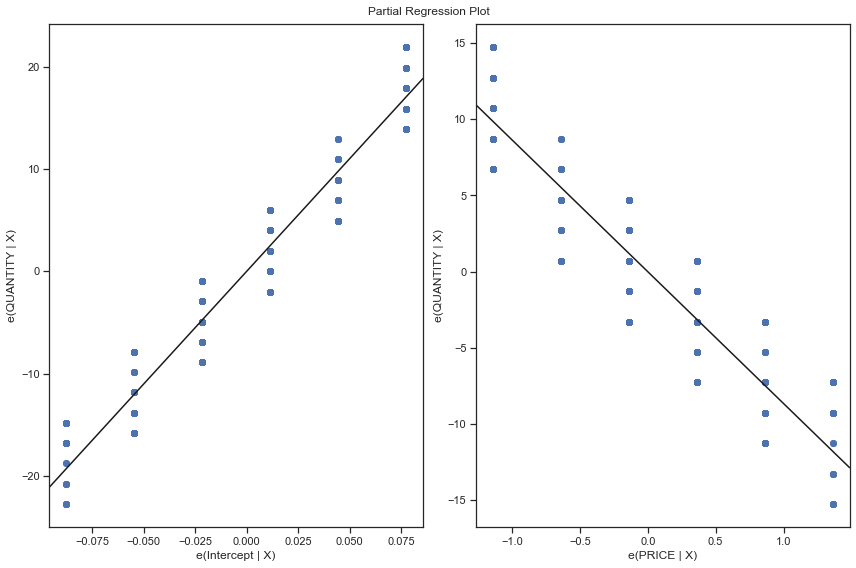

In [49]:
price_elasticity, model_burger_bau_1070_outdoor = model_and_elasticity(burger_bau_1070_outdoor)

In [50]:
def optimal_price(data, model, buying_price):
    start_price = data['PRICE'].min() - 1
    end_price = data['PRICE'].min() + 10
    result = pd.DataFrame(columns = ['PRICE', 'QUANTITY'])
    result['PRICE'] = np.arange(start_price, end_price, 0.01)
    result['QUANTITY'] = model.predict(result['PRICE'])
    result['PROFIT'] = (result['PRICE'] - buying_price) * result['QUANTITY']
    ind = np.where(result['PROFIT'] == result['PROFIT'].max())[0][0]
    maximum_profit_price = result.iloc[ind]
    plt.plot(result['PRICE'] , result['QUANTITY'], label='Quantity')
    plt.plot(result['PRICE'], result['PROFIT'], label='Profit')
    plt.axvline(x=maximum_profit_price['PRICE'], color='r', alpha=0.5, linestyle='--', label='Price for maximum profit')
    plt.legend(bbox_to_anchor =(1, 1))
    plt.title('Quantity and Profit Comparison Related to Price')
    plt.show
    return maximum_profit_price

PRICE        17.220000
QUANTITY     71.259194
PROFIT      585.750572
Name: 422, dtype: float64

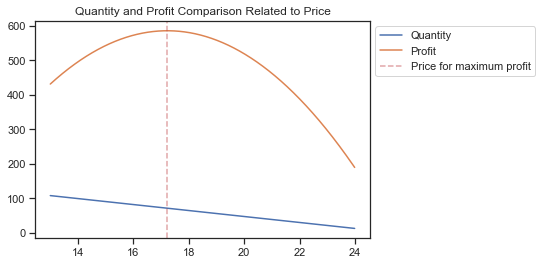

In [51]:
optimal_price(burger_bau_1070_outdoor, model_burger_bau_1070_outdoor, 9)